In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)


Data Load: Load house prices into a dataframe

In [3]:
project_dir = "/gdrive/Propulsion/data"

In [19]:
df1 = pd.read_csv(r"\Users\Konstantinos\Downloads\all_district_houses.csv")
df1


,Unnamed: 0,id,listingType.type,listing.address.country,listing.address.geoCoordinates.accuracy,listing.address.geoCoordinates.manual,listing.address.geoCoordinates.latitude,listing.address.geoCoordinates.longitude,listing.address.geoHierarchy.placeId,listing.address.geoHierarchy.zip,...,listing.characteristics.isUnderRoof,listing.characteristics.isGroundFloor,listing.characteristics.hasFlatSharingCommunity,listing.characteristics.isMiddleHouse,listing.characteristics.isCornerHouse,listing.characteristics.hasSwimmingPool,listing.characteristics.hasGasSupply,listing.characteristics.hasGardenShed,listing.characteristics.hallHeight,listing.characteristics.hasLiftingPlatform
0,0,3000895330,TOP,CH,HIGH,True,47.353889,8.556962,35533,8008,...,False,False,False,False,False,False,False,False,NaN,False
1,1,3000895308,STANDARD,CH,HIGH,True,47.354681,8.602949,35580,8053,...,False,False,False,False,False,False,False,False,NaN,False
2,2,3000895260,STANDARD,CH,MEDIUM,False,47.386736,8.488097,35572,8048,...,False,False,False,False,False,False,False,False,NaN,False
3,3,3000895250,STANDARD,CH,HIGH,False,47.335091,8.532501,35559,8038,...,False,False,False,False,False,False,False,False,NaN,False
4,4,3000895213,STANDARD,CH,HIGH,False,47.408682,8.556563,35574,8050,...,False,False,False,False,False,False,False,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,100,3000294719,STANDARD,CH,MEDIUM,False,47.669658,8.640890,35718,8248,...,False,True,False,False,False,False,False,False,NaN,False
4765,101,3000288909,STANDARD,CH,HIGH,False,47.641804,8.600154,35850,8462,...,False,False,True,False,False,False,False,False,NaN,False
4766,102,3000236595,STANDARD,CH,HIGH,False,47.570332,8.598484,35822,8415,...,False,False,False,False,False,False,False,False,NaN,False
4767,103,2147965195,STANDARD,CH,HIGH,NaN,47.691967,8.637208,35715,8245,...,False,False,False,False,False,False,False,False,NaN,False


In [ ]:

df1.shape

(63023, 13)

In [ ]:
df1.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [ ]:
# df1['Suburb'].unique()

In [ ]:
df1['Suburb'].value_counts()

Reservoir         1241
Bentleigh East     845
Mount Waverley     831
Richmond           822
Glen Waverley      819
                  ... 
Warneet              1
Belgrave South       1
Toolern Vale         1
Castella             1
Wildwood             1
Name: Suburb, Length: 380, dtype: int64

Drop features that are not required to build our model

In [ ]:


df2 = df1.drop(['Address', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],axis='columns')
df2.shape

(63023, 4)


Data Cleaning: Handle NA values

In [ ]:

df2.isnull().sum()

Suburb        0
Rooms         0
Type          0
Price     14590
dtype: int64

In [ ]:
df2.shape

(63023, 4)

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

Suburb    0
Rooms     0
Type      0
Price     0
dtype: int64

In [ ]:
df3.shape

(48433, 4)

Feature Engineering

<!-- 

```
# This is formatted as code
```

Add new feature(integer) for bhk (Bedrooms Hall Kitchen) -->

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [ ]:
df3.Suburb = df3.Suburb.apply(lambda x: x.strip())
location_stats = df3['Suburb'].value_counts(ascending=False)
location_stats

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Reservoir         1067
Bentleigh East     696
Richmond           642
Craigieburn        598
Preston            593
                  ... 
Seville              1
Castella             1
Pentland Hills       1
Warneet              1
Don Valley           1
Name: Suburb, Length: 370, dtype: int64

In [ ]:
location_stats.values.sum()

48433

In [ ]:
len(location_stats[location_stats>10])

301

In [ ]:

len(location_stats)

370

In [ ]:
len(location_stats[location_stats<=10])

69


Dimensionality Reduction:
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10


Skye                10
Cranbourne North    10
Manor Lakes         10
Bacchus Marsh        9
Docklands            9
                    ..
Seville              1
Castella             1
Pentland Hills       1
Warneet              1
Don Valley           1
Name: Suburb, Length: 69, dtype: int64

In [ ]:
len(df3.Suburb.unique())

370

In [ ]:

df3.Suburb = df3.Suburb.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.Suburb.unique())

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


302

In [ ]:
df3.head(10)

,Suburb,Rooms,Type,Price
0,Abbotsford,3,h,1490000.0
1,Abbotsford,3,h,1220000.0
2,Abbotsford,3,h,1420000.0
3,Aberfeldie,3,h,1515000.0
4,Airport West,2,h,670000.0
5,Airport West,2,t,530000.0
6,Airport West,2,u,540000.0
7,Airport West,3,h,715000.0
9,Albert Park,3,h,1925000.0
10,Albion,3,u,515000.0


Outlier Removal Using Business Logic.
Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

Let's check if for a given location how does the 2 rooms and 3 rooms properties prices look like.

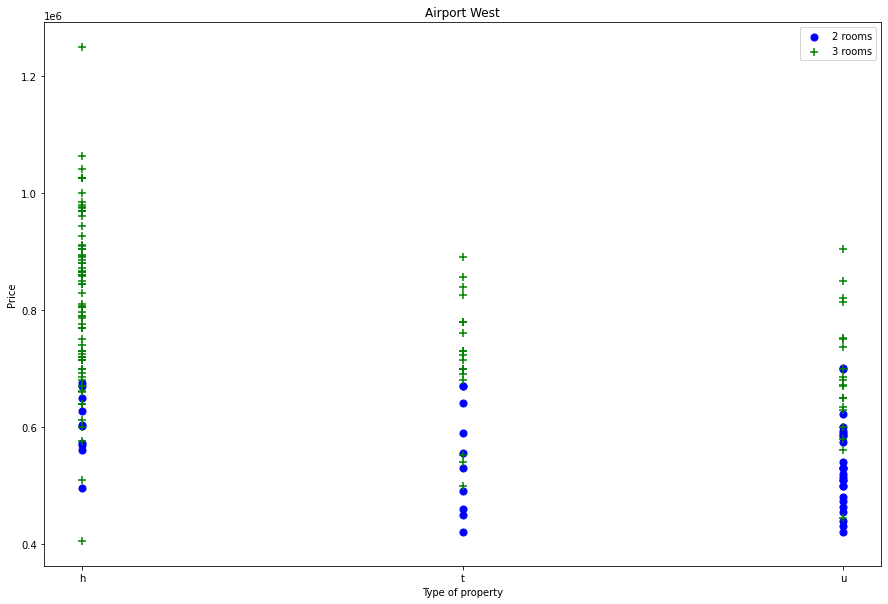

In [ ]:

def plot_scatter_chart(df,suburb):
    rm2 = df[(df.Suburb==suburb) & (df.Rooms==2)]
    rm3 = df[(df.Suburb==suburb) & (df.Rooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(rm2.Type,rm2.Price,color='blue',label='2 rooms', s=50)
    plt.scatter(rm3.Type,rm3.Price,marker='+', color='green',label='3 rooms', s=50)
    plt.xlabel("Type of property")
    plt.ylabel("Price")
    plt.title(suburb)
    plt.legend()
    
plot_scatter_chart(df3,"Airport West")


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.



Now we can remove those 2 room apartments whose price is less than mean price of 1 room apartment



In [ ]:
def remove_room_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Suburb'):
        room_stats = {}
        for room, room_df in location_df.groupby('Rooms'):
            room_stats[room] = {
                'mean': np.mean(room_df.Price),
                'std': np.std(room_df.Price),
                'count': room_df.shape[0]
            }
        for room, room_df in location_df.groupby('Rooms'):
            stats = room_stats.get(room-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, room_df[room_df.Price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_room_outliers(df3)
# df4 = df3.copy()
df4.shape

(43383, 4)

Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties



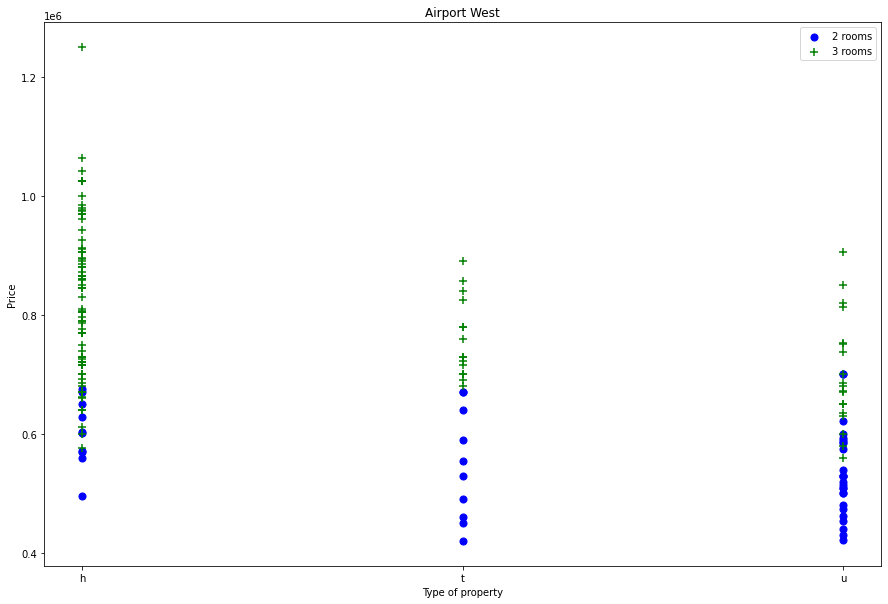

In [ ]:
plot_scatter_chart(df4,"Airport West")


Text(0, 0.5, 'Count')

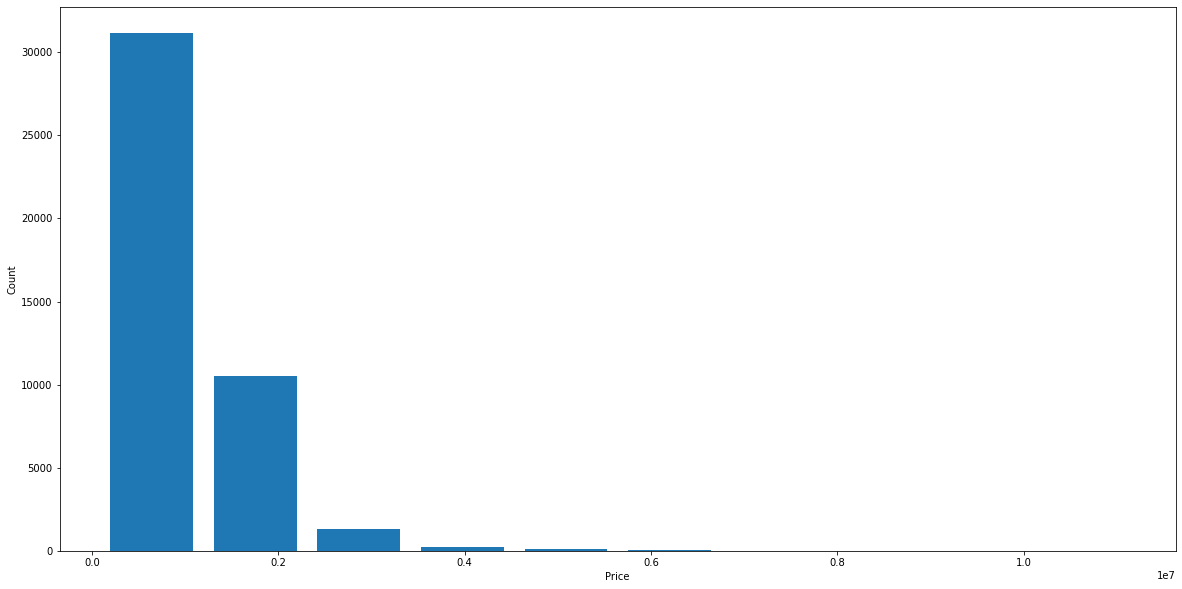

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.Price,rwidth=0.8)
plt.xlabel("Price")
plt.ylabel("Count")


Use One Hot Encoding For Location

In [ ]:

dummies = pd.get_dummies(df4.Suburb)
dummies.head(3)

dummies2 = pd.get_dummies(df4.Type)
dummies2.head(3)

,h,t,u
0,1,0,0
1,1,0,0
2,1,0,0


In [ ]:
df5 = pd.concat([df4,dummies.drop('other',axis='columns'),dummies2],axis='columns')
df5.head()


,Suburb,Rooms,Type,Price,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Ardeer,Armadale,Ascot Vale,Ashburton,Ashwood,Aspendale,Aspendale Gardens,Attwood,Avondale Heights,Balaclava,Balwyn,Balwyn North,Bayswater,Bayswater North,Beaumaris,Bellfield,Bentleigh,Bentleigh East,Berwick,Black Rock,Blackburn,Blackburn North,Blackburn South,Bonbeach,Boronia,Box Hill,...,Sydenham,Tarneit,Taylors Hill,Taylors Lakes,Templestowe,Templestowe Lower,The Basin,Thomastown,Thornbury,Toorak,Travancore,Truganina,Tullamarine,Vermont,Vermont South,Viewbank,Wallan,Wantirna,Wantirna South,Warrandyte,Warranwood,Waterways,Watsonia,Watsonia North,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,h,t,u
0,Abbotsford,3,h,1490000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Abbotsford,3,h,1220000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Abbotsford,3,h,1420000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Aberfeldie,3,h,1515000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Airport West,2,h,670000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df6 = df5.drop(['Suburb','Type'],axis='columns')
df6.head(2)


,Rooms,Price,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Ardeer,Armadale,Ascot Vale,Ashburton,Ashwood,Aspendale,Aspendale Gardens,Attwood,Avondale Heights,Balaclava,Balwyn,Balwyn North,Bayswater,Bayswater North,Beaumaris,Bellfield,Bentleigh,Bentleigh East,Berwick,Black Rock,Blackburn,Blackburn North,Blackburn South,Bonbeach,Boronia,Box Hill,Braybrook,Briar Hill,...,Sydenham,Tarneit,Taylors Hill,Taylors Lakes,Templestowe,Templestowe Lower,The Basin,Thomastown,Thornbury,Toorak,Travancore,Truganina,Tullamarine,Vermont,Vermont South,Viewbank,Wallan,Wantirna,Wantirna South,Warrandyte,Warranwood,Waterways,Watsonia,Watsonia North,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,h,t,u
0,3,1490000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,1220000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df6.shape

(43383, 306)

In [ ]:

X = df6.drop(['Price'],axis='columns')
X.head(3)

,Rooms,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Ardeer,Armadale,Ascot Vale,Ashburton,Ashwood,Aspendale,Aspendale Gardens,Attwood,Avondale Heights,Balaclava,Balwyn,Balwyn North,Bayswater,Bayswater North,Beaumaris,Bellfield,Bentleigh,Bentleigh East,Berwick,Black Rock,Blackburn,Blackburn North,Blackburn South,Bonbeach,Boronia,Box Hill,Braybrook,Briar Hill,Brighton,...,Sydenham,Tarneit,Taylors Hill,Taylors Lakes,Templestowe,Templestowe Lower,The Basin,Thomastown,Thornbury,Toorak,Travancore,Truganina,Tullamarine,Vermont,Vermont South,Viewbank,Wallan,Wantirna,Wantirna South,Warrandyte,Warranwood,Waterways,Watsonia,Watsonia North,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,h,t,u
0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X.shape

(43383, 305)

In [ ]:
y = df6.Price
y.head(3)

0    1490000.0
1    1220000.0
2    1420000.0
Name: Price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


Use K Fold cross validation to measure accuracy of our LinearRegression model


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.66999263, 0.66704437, 0.65371889, 0.66866224, 0.66605074])

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.6767311598611496

In [ ]:

dt_clf = DecisionTreeRegressor()
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

0.7656841713566223

We can see that in 5 iterations we get a score above 60% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

Find best model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366149067641506.0, tolerance: 1285387846647.1277
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369227752277433.0, tolerance: 1292040503076.3826
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425495002952141.0, tolerance: 1282468205159.7324
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 600062390

,model,best_score,best_params
0,linear_regression,0.665146,{'normalize': True}
1,lasso,0.665146,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.763561,"{'criterion': 'friedman_mse', 'splitter': 'best'}"



Based on above results we can say that Decision tree gives the best score. Hence we will use that.

Test the model for few properties

In [ ]:

# def predict_price(suburb,rooms):    
#     loc_index = np.where(X.columns==suburb)[0][0]

#     x = np.zeros(len(X.columns))
# #   x[0] = Type
#     x[0] = rooms
#     if loc_index >= 0:
#         x[loc_index] = 1

#     return lr_clf.predict([x])[0]

def predict_price(suburb,Type,rooms):    
    loc_index = np.where(X.columns==suburb)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = rooms
    x[1] = Type
    if loc_index >= 0:
        x[loc_index] = 1

    return dt_clf.predict([x])[0]

In [ ]:
predict_price('Airport West', 3, 1)

733500.0

In [4]:
import pickle
with open('melbourne_house_price_model.pickle','wb') as f:
    pickle_dump(lr_clf,f)

NameError: name 'pickle_dump' is not defined